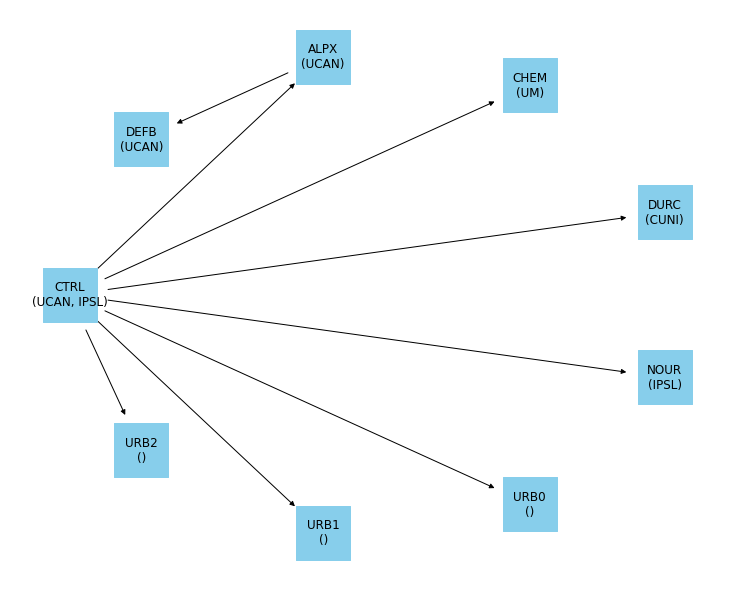

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import yaml

def plot_dag(dag_data):
    G = nx.DiGraph()
    for node in dag_data['simulations']:
        label = f"{node['simulation_id']}\n({node['institution_id']})"
        G.add_node(node['simulation_id'], label=label)
        parent_id = node.get('parent_id')
        if parent_id is not None:
            G.add_edge(parent_id, node['simulation_id'])
    #pos = nx.spring_layout(G)
    #pos = nx.circular_layout(G)
    pos = nx.shell_layout(G)
    labels = {k: v['label'] for k, v in G.nodes.items()}
    # Plot
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', node_shape='s')
    plt.show()

with open('FPS-URB-RCC_STAGE-0_WRF_experiment_design.yaml', 'r') as file:
    dag_data = yaml.safe_load(file)
plot_dag(dag_data)

In [2]:
df = pd.DataFrame()
for sim in dag_data['simulations']:
    df = df.append(sim, ignore_index=True)
df.set_index("simulation_id", inplace=True)
df = df[["parent_id", "simulation", "institution_id", "parameters", "description"]]
df

,parent_id,simulation,institution_id,parameters,description
simulation_id,,,,,
CTRL,NaN,Control simulation,"UCAN, IPSL",{'sf_urban_physics': 3},FRA-12 > PAR-3 nesting. WUDAPT LCZs on Coperni...
URB2,CTRL,BEP model,,{'sf_urban_physics': 2},BEP model
URB1,CTRL,SLUCM model,,{'sf_urban_physics': 1},Bound to a different set (and number) of verti...
URB0,CTRL,No urban parameterization (but urban category ...,,{'sf_urban_physics': 0},Allows assessing the existing EURO-CORDEX WRF ...
NOUR,CTRL,No urban areas,IPSL,{'sf_urban_physics': 0},nourban static data from w2w.py. Allows to ass...
DURC,CTRL,Default urban categories,CUNI,{'sf_urban_physics': 3},Use the default land-use data (MODIS) also for...
CHEM,CTRL,Use chemical transport model (WRF-CHEM),UM,{'sf_urban_physics': 3},Use chemical transport model (WRF-CHEM)
ALPX,CTRL,Extended convection-permitting domain (I4C ALP...,UCAN,{'sf_urban_physics': 3},Extended convection-permitting domain (I4C ALP...
DEFB,ALPX,Default building morphological parameters,UCAN,{'sf_urban_physics': 3},None
